In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [10]:
transform = transforms.Compose([
    transforms.Resize(128),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.ImageFolder(root='data/train', transform=transform)
test_dataset = datasets.ImageFolder(root='data/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [11]:
class Generator_1(nn.Module):
    def __init__(self):
        super(Generator_1, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(100, 128 * 8 * 8),
            nn.ReLU(True),
            nn.Unflatten(1, (128, 8, 8)),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, 4, 2, 1),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 3, 4, 2, 1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x)

class Discriminator_1(nn.Module):
    def __init__(self):
        super(Discriminator_1, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 16, 4, 2, 1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(16, 32, 4, 2, 1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(32, 64, 4, 2, 1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Flatten(),
            nn.Linear(128 * 8 * 8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x)

class Generator_2(nn.Module):
    def __init__(self):
        super(Generator_2, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(100, 128 * 8 * 8),
            nn.ReLU(True),
            nn.Unflatten(1, (128, 8, 8)),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.Dropout(0.5),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(True),
            nn.Dropout(0.5),
            nn.ConvTranspose2d(32, 16, 4, 2, 1),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 3, 4, 2, 1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x)

class Discriminator_2(nn.Module):
    def __init__(self):
        super(Discriminator_2, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 16, 3, 2, 1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(16, 32, 3, 2, 1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.5),
            nn.Conv2d(32, 64, 3, 2, 1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.5),
            nn.Flatten(),
            nn.Linear(128 * 8 * 8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x)

class Generator_3(nn.Module):
    def __init__(self):
        super(Generator_3, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(100, 128 * 8 * 8),
            nn.ReLU(True),
            nn.Unflatten(1, (128, 8, 8)),
            nn.ConvTranspose2d(128, 64, 3, 2, 1, output_padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 32, 3, 2, 1, output_padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, 3, 2, 1, output_padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 3, 3, 2, 1, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x)

class Discriminator_3(nn.Module):
    def __init__(self):
        super(Discriminator_3, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 16, 3, 2, 1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(16, 32, 3, 2, 1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(32, 64, 3, 2, 1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Flatten(),
            nn.Linear(128 * 8 * 8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x)

In [12]:
criterion = nn.BCELoss()
num_epochs = 2000
fixed_noise = torch.randn(64, 100, device=device)

def save_generated_images(grid, epoch, interval=100, folder=1, dpi=200):
    if epoch == 0 or (epoch + 1) % interval == 0:
        plt.figure(figsize=(8, 8), dpi=dpi)
        plt.axis("off")
        plt.title(f"Generated Images - Epoch {epoch+1}")
        
        reshaped_grid = grid[:64].reshape(8, 8, 128, 128, 3)
        transposed_grid = np.transpose(reshaped_grid, (0, 2, 1, 3, 4))
        combined_image = transposed_grid.reshape(8 * 128, 8 * 128, 3)
        
        plt.imshow(combined_image)
        
        if folder == 1:
            save_path = f"model_1/generated_image_epoch_{epoch+1}.png"
        elif folder == 2:
            save_path = f"model_2/generated_image_epoch_{epoch+1}.png"
        elif folder == 3:
            save_path = f"model_3/generated_image_epoch_{epoch+1}.png"
        
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
        plt.close()

In [13]:
G = Generator_1().to(device)
D = Discriminator_1().to(device)
optimizerD = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
G_losses = []
D_losses = []

for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(train_loader):
        batch_size = real_images.size(0)
        real_images = real_images.to(device)

        # Train Discriminator
        D.zero_grad()
        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        outputs = D(real_images)
        D_loss_real = criterion(outputs, real_labels)
        D_loss_real.backward()

        noise = torch.randn(batch_size, 100, device=device)
        fake_images = G(noise)
        outputs = D(fake_images.detach())
        D_loss_fake = criterion(outputs, fake_labels)
        D_loss_fake.backward()

        optimizerD.step()

        D_loss = D_loss_real + D_loss_fake

        # Train Generator
        G.zero_grad()
        outputs = D(fake_images)
        G_loss = criterion(outputs, real_labels)
        G_loss.backward()

        optimizerG.step()

        G_losses.append(G_loss.item())
        D_losses.append(D_loss.item())

        if i % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}] Batch [{i}/{len(train_loader)}] '
                  f'Loss D: {D_loss.item()}, loss G: {G_loss.item()}')

    with torch.no_grad():
        fake_images = G(fixed_noise).detach().cpu()
    grid = np.transpose(fake_images.numpy(), (0, 2, 3, 1))
    grid = (grid + 1) / 2  # Normalize to [0, 1]

    save_generated_images(grid, epoch, 100, 1)

Epoch [1/2000] Batch [0/15] Loss D: 1.4853591918945312, loss G: 0.9819313287734985
Epoch [2/2000] Batch [0/15] Loss D: 0.6651631593704224, loss G: 1.9268053770065308
Epoch [3/2000] Batch [0/15] Loss D: 0.384691059589386, loss G: 3.185950517654419
Epoch [4/2000] Batch [0/15] Loss D: 0.26602494716644287, loss G: 4.055389404296875
Epoch [5/2000] Batch [0/15] Loss D: 0.1189248338341713, loss G: 4.937045097351074
Epoch [6/2000] Batch [0/15] Loss D: 0.0739278718829155, loss G: 5.996716499328613
Epoch [7/2000] Batch [0/15] Loss D: 0.04955273121595383, loss G: 6.319851398468018
Epoch [8/2000] Batch [0/15] Loss D: 0.03676454722881317, loss G: 6.0990400314331055
Epoch [9/2000] Batch [0/15] Loss D: 0.04956076294183731, loss G: 6.971268653869629
Epoch [10/2000] Batch [0/15] Loss D: 0.034986525774002075, loss G: 6.4339165687561035
Epoch [11/2000] Batch [0/15] Loss D: 0.07572416961193085, loss G: 8.468146324157715
Epoch [12/2000] Batch [0/15] Loss D: 0.07629326730966568, loss G: 7.901668548583984
Ep

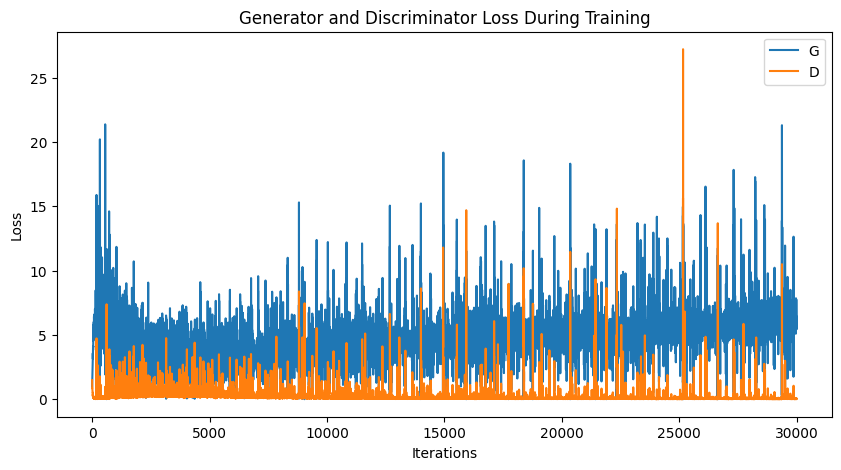

In [14]:
plt.figure(figsize=(10, 5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses, label="G")
plt.plot(D_losses, label="D")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [15]:
G = Generator_2().to(device)
D = Discriminator_2().to(device)
optimizerD = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
G_losses = []
D_losses = []

for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(train_loader):
        batch_size = real_images.size(0)
        real_images = real_images.to(device)

        # Train Discriminator
        D.zero_grad()
        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        outputs = D(real_images)
        D_loss_real = criterion(outputs, real_labels)
        D_loss_real.backward()

        noise = torch.randn(batch_size, 100, device=device)
        fake_images = G(noise)
        outputs = D(fake_images.detach())
        D_loss_fake = criterion(outputs, fake_labels)
        D_loss_fake.backward()

        optimizerD.step()

        D_loss = D_loss_real + D_loss_fake

        # Train Generator
        G.zero_grad()
        outputs = D(fake_images)
        G_loss = criterion(outputs, real_labels)
        G_loss.backward()

        optimizerG.step()

        G_losses.append(G_loss.item())
        D_losses.append(D_loss.item())

        if i % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}] Batch [{i}/{len(train_loader)}] '
                  f'Loss D: {D_loss.item()}, loss G: {G_loss.item()}')

    with torch.no_grad():
        fake_images = G(fixed_noise).detach().cpu()
    grid = np.transpose(fake_images.numpy(), (0, 2, 3, 1))
    grid = (grid + 1) / 2  # Normalize to [0, 1]

    save_generated_images(grid, epoch, 100, 2)

Epoch [1/2000] Batch [0/15] Loss D: 1.522775411605835, loss G: 0.7312794923782349
Epoch [2/2000] Batch [0/15] Loss D: 0.9262393712997437, loss G: 1.1607236862182617
Epoch [3/2000] Batch [0/15] Loss D: 0.9534571170806885, loss G: 1.2096518278121948
Epoch [4/2000] Batch [0/15] Loss D: 0.6399017572402954, loss G: 1.8722279071807861
Epoch [5/2000] Batch [0/15] Loss D: 0.353371262550354, loss G: 2.7047829627990723
Epoch [6/2000] Batch [0/15] Loss D: 0.1838274598121643, loss G: 3.4461402893066406
Epoch [7/2000] Batch [0/15] Loss D: 0.1560807079076767, loss G: 3.8541808128356934
Epoch [8/2000] Batch [0/15] Loss D: 0.11033901572227478, loss G: 4.242993354797363
Epoch [9/2000] Batch [0/15] Loss D: 0.06196628883481026, loss G: 4.744044780731201
Epoch [10/2000] Batch [0/15] Loss D: 0.05569305643439293, loss G: 4.72458553314209
Epoch [11/2000] Batch [0/15] Loss D: 0.0242388304322958, loss G: 6.46106481552124
Epoch [12/2000] Batch [0/15] Loss D: 0.02815110795199871, loss G: 5.272897720336914
Epoch 

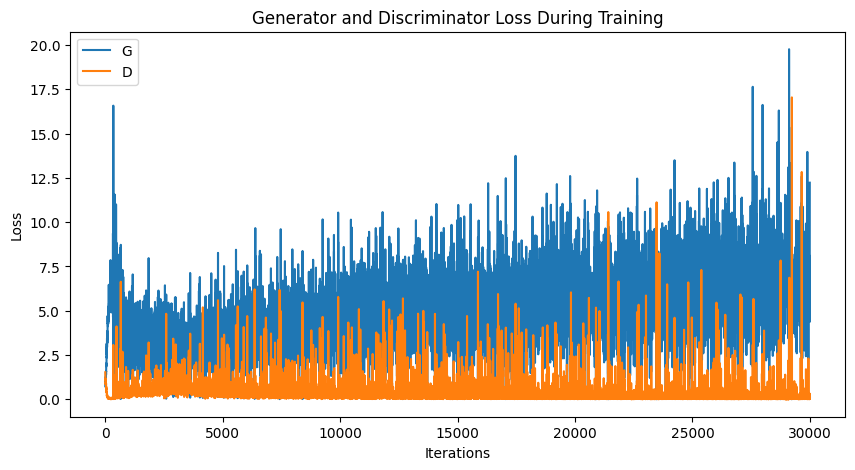

In [16]:
plt.figure(figsize=(10, 5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses, label="G")
plt.plot(D_losses, label="D")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [17]:
G = Generator_3().to(device)
D = Discriminator_3().to(device)
optimizerD = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
G_losses = []
D_losses = []

for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(train_loader):
        batch_size = real_images.size(0)
        real_images = real_images.to(device)

        # Train Discriminator
        D.zero_grad()
        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        outputs = D(real_images)
        D_loss_real = criterion(outputs, real_labels)
        D_loss_real.backward()

        noise = torch.randn(batch_size, 100, device=device)
        fake_images = G(noise)
        outputs = D(fake_images.detach())
        D_loss_fake = criterion(outputs, fake_labels)
        D_loss_fake.backward()

        optimizerD.step()

        D_loss = D_loss_real + D_loss_fake

        # Train Generator
        G.zero_grad()
        outputs = D(fake_images)
        G_loss = criterion(outputs, real_labels)
        G_loss.backward()

        optimizerG.step()

        G_losses.append(G_loss.item())
        D_losses.append(D_loss.item())

        if i % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}] Batch [{i}/{len(train_loader)}] '
                  f'Loss D: {D_loss.item()}, loss G: {G_loss.item()}')

    with torch.no_grad():
        fake_images = G(fixed_noise).detach().cpu()
    grid = np.transpose(fake_images.numpy(), (0, 2, 3, 1))
    grid = (grid + 1) / 2  # Normalize to [0, 1]

    save_generated_images(grid, epoch, 100, 3)

Epoch [1/2000] Batch [0/15] Loss D: 1.43879234790802, loss G: 0.855107307434082
Epoch [2/2000] Batch [0/15] Loss D: 0.6070324182510376, loss G: 1.7025437355041504
Epoch [3/2000] Batch [0/15] Loss D: 0.235978364944458, loss G: 2.8855085372924805
Epoch [4/2000] Batch [0/15] Loss D: 0.1478021889925003, loss G: 3.6352076530456543
Epoch [5/2000] Batch [0/15] Loss D: 0.06860041618347168, loss G: 4.707305908203125
Epoch [6/2000] Batch [0/15] Loss D: 0.03150826692581177, loss G: 5.588394641876221
Epoch [7/2000] Batch [0/15] Loss D: 0.050612859427928925, loss G: 6.221469879150391
Epoch [8/2000] Batch [0/15] Loss D: 0.04091282933950424, loss G: 6.0473737716674805
Epoch [9/2000] Batch [0/15] Loss D: 0.026296371594071388, loss G: 5.995096206665039
Epoch [10/2000] Batch [0/15] Loss D: 0.01665913127362728, loss G: 6.497803211212158
Epoch [11/2000] Batch [0/15] Loss D: 0.02763414941728115, loss G: 7.831662178039551
Epoch [12/2000] Batch [0/15] Loss D: 0.023275841027498245, loss G: 7.146048069000244
E

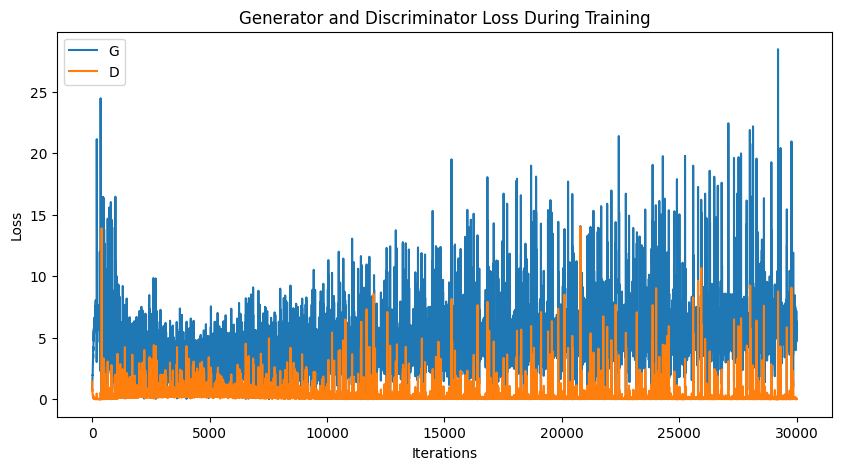

In [18]:
plt.figure(figsize=(10, 5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses, label="G")
plt.plot(D_losses, label="D")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()